In [1]:
import pandas as pd
import requests
from IPython.display import clear_output
import matplotlib.pyplot as plt
import datetime
import numpy as np
import scipy.stats as st

In [2]:
#read weather CSV data file and crop yield files by state
df = pd.read_csv('Weather_Data/aggregated_weather.csv')
mo_yields_df = pd.read_csv('mo_yields.csv')
tx_yields_df = pd.read_csv('tx_yields.csv')
il_yields_df = pd.read_csv('il_yields.csv')
ia_yields_df = pd.read_csv('ia_yields.csv')
ks_yields_df = pd.read_csv('ks_yields.csv')


In [3]:
df['DATE'].dtype

dtype('O')

In [4]:
ks_yields_df['Year']=ks_yields_df['Year'].astype('str')
mo_yields_df['Year']=mo_yields_df['Year'].astype('str')
il_yields_df['Year']=il_yields_df['Year'].astype('str')
ia_yields_df['Year']=ia_yields_df['Year'].astype('str')
tx_yields_df['Year']=tx_yields_df['Year'].astype('str')

In [5]:
df['DATE']=pd.to_datetime(df['DATE'])
df['MONTH']=[d.strftime('%B')for d in df['DATE']]
df['YEAR']=[d.strftime('%Y')for d in df['DATE']]

In [6]:
#clean up the data by removing unnecessary columns and merging COUNTY_STATE
df['COUNTY_STATE']=df['COUNTY']+', '+df['STATE']
df=df.drop(columns=['Fastest 2-minute wind speed (MPH)','LONGITUDE','LATITUDE','Fastest 5-minute wind speed (MPH)','Direction of fastest 2-minute wind speed','ELEVATION','Direction of fastest 5-minute wind speed'])
df.head()

,STATION,Precipitation (Inches),DATE,Average daily wind speed (MPH),Maximum temperature (F),Minimum temperature (F),COUNTY_STATE,COUNTY,STATE,MONTH,YEAR
0,USW00013993,0.0,2000-01-01,8.50,60,30,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
1,USW00013993,0.0,2000-01-02,11.63,56,29,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
2,USW00013993,0.0,2000-01-03,14.09,37,30,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
3,USW00013993,0.0,2000-01-04,12.30,30,13,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000
4,USW00013993,0.0,2000-01-05,12.75,49,16,"BUCHANAN, MISSOURI",BUCHANAN,MISSOURI,January,2000


In [7]:
summer_weather=df.loc[(df['MONTH']=='May')|(df['MONTH']=='June')|(df['MONTH']=='July')|(df['MONTH']=='August')]


In [8]:
mo_weather=summer_weather.loc[summer_weather['STATE']=='MISSOURI']
tx_weather=summer_weather.loc[summer_weather['STATE']=='TEXAS']
il_weather=summer_weather.loc[summer_weather['STATE']=='ILLINOIS']
ia_weather=summer_weather.loc[summer_weather['STATE']=='IOWA']
ks_weather=summer_weather.loc[summer_weather['STATE']=='KANSAS']

In [9]:
group_tx_weather = tx_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_mo_weather = mo_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_il_weather = il_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_ia_weather = ia_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])
group_ks_weather = ks_weather.groupby(['COUNTY_STATE','YEAR','MONTH'])


In [10]:
tx_precip = pd.DataFrame(group_tx_weather['Precipitation (Inches)'].sum())
tx_precip.reset_index(inplace=True)
mo_precip = pd.DataFrame(group_mo_weather['Precipitation (Inches)'].sum())
mo_precip.reset_index(inplace=True)
il_precip = pd.DataFrame(group_il_weather['Precipitation (Inches)'].sum())
il_precip.reset_index(inplace=True)
ia_precip = pd.DataFrame(group_ia_weather['Precipitation (Inches)'].sum())
ia_precip.reset_index(inplace=True)
ks_precip = pd.DataFrame(group_ks_weather['Precipitation (Inches)'].sum())
ks_precip.reset_index(inplace=True)

In [11]:
tx_temp = pd.DataFrame(group_tx_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
mo_temp = pd.DataFrame(group_mo_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
il_temp = pd.DataFrame(group_il_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
ia_temp = pd.DataFrame(group_ia_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())
ks_temp = pd.DataFrame(group_ks_weather[['Maximum temperature (F)', 'Minimum temperature (F)']].mean())


In [12]:
tx_monthly_summary = pd.merge(tx_precip, tx_temp, on=['COUNTY_STATE','YEAR','MONTH'])
mo_monthly_summary = pd.merge(mo_precip, mo_temp, on=['COUNTY_STATE','YEAR','MONTH'])
il_monthly_summary = pd.merge(il_precip, il_temp, on=['COUNTY_STATE','YEAR','MONTH'])
ia_monthly_summary = pd.merge(ia_precip, ia_temp, on=['COUNTY_STATE','YEAR','MONTH'])
ks_monthly_summary = pd.merge(ks_precip, ks_temp, on=['COUNTY_STATE','YEAR','MONTH'])
mo_monthly_summary.head()

,COUNTY_STATE,YEAR,MONTH,Precipitation (Inches),Maximum temperature (F),Minimum temperature (F)
0,"ADAIR, MISSOURI",2000,August,3.33,84.466667,66.300000
1,"ADAIR, MISSOURI",2000,July,1.58,82.466667,64.800000
2,"ADAIR, MISSOURI",2000,June,6.94,78.666667,59.066667
3,"ADAIR, MISSOURI",2000,May,0.72,75.935484,53.677419
4,"ADAIR, MISSOURI",2001,August,4.99,83.241379,64.034483


In [13]:
tx_monthly_summary = tx_monthly_summary.rename(columns={'YEAR':"Year"})
mo_monthly_summary = mo_monthly_summary.rename(columns={'YEAR':"Year"})
il_monthly_summary = il_monthly_summary.rename(columns={'YEAR':"Year"})
ia_monthly_summary = ia_monthly_summary.rename(columns={'YEAR':"Year"})
ks_monthly_summary = ks_monthly_summary.rename(columns={'YEAR':"Year"})


In [14]:
mo_df = pd.merge(mo_monthly_summary, mo_yields_df, on = ['COUNTY_STATE','Year'])
tx_df = pd.merge(tx_monthly_summary, tx_yields_df, on = ['COUNTY_STATE','Year'])
il_df = pd.merge(il_monthly_summary, il_yields_df, on = ['COUNTY_STATE','Year'])
ia_df = pd.merge(ia_monthly_summary, ia_yields_df, on = ['COUNTY_STATE','Year'])
ks_df = pd.merge(ks_monthly_summary, ks_yields_df, on = ['COUNTY_STATE','Year'])

In [15]:
mo_df.to_csv("mo_final.csv")
tx_df.to_csv("tx_final.csv")
il_df.to_csv("il_final.csv")
ia_df.to_csv("ia_final.csv")
ks_df.to_csv("ks_final.csv")

In [16]:
soybean_mo = mo_df[mo_df["Soybean Yield"].notnull()]
soybean_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 1033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             966 non-null    object 
 1   Year                     966 non-null    object 
 2   MONTH                    966 non-null    object 
 3   Precipitation (Inches)   966 non-null    float64
 4   Maximum temperature (F)  966 non-null    float64
 5   Minimum temperature (F)  966 non-null    float64
 6   Unnamed: 0               966 non-null    int64  
 7   State                    966 non-null    object 
 8   County                   966 non-null    object 
 9   Corn Yield               882 non-null    float64
 10  Wheat Yield              408 non-null    float64
 11  Soybean Yield            966 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 98.1+ KB


In [17]:
x_axis = soybean_mo["Soybean Yield"]
y_axis = soybean_mo['Precipitation (Inches)']


0.038022819955809355
4.180294707989933
0.0649099563244618
0.22983459045651344
0.031608443719259506
The r-squared is: 0.004213302430043538


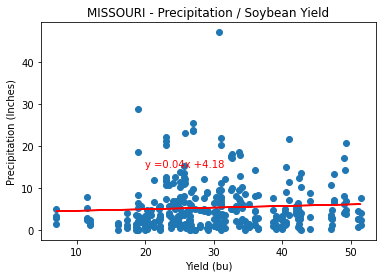

In [22]:

plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Precipitation / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,15), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_mo.png")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")


In [23]:
soybean_tx = tx_df[tx_df['Soybean Yield'].notnull()]
soybean_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 84 to 1667
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             344 non-null    object 
 1   Year                     344 non-null    object 
 2   MONTH                    344 non-null    object 
 3   Precipitation (Inches)   344 non-null    float64
 4   Maximum temperature (F)  344 non-null    float64
 5   Minimum temperature (F)  344 non-null    float64
 6   Unnamed: 0               344 non-null    int64  
 7   State                    344 non-null    object 
 8   County                   344 non-null    object 
 9   Corn Yield               284 non-null    float64
 10  Wheat Yield              132 non-null    float64
 11  Soybean Yield            344 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 34.9+ KB


In [24]:
x_axis = soybean_tx["Soybean Yield"]
y_axis = soybean_tx['Precipitation (Inches)']

0.038022819955809355
4.180294707989933
0.0649099563244618
0.22983459045651344
0.031608443719259506
The r-squared is: 0.004213302430043538


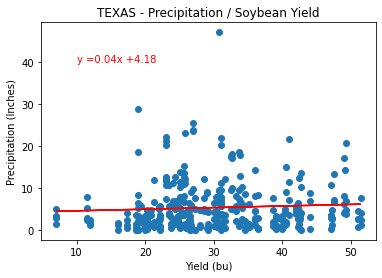

In [21]:
x_axis = soybean_tx["Soybean Yield"]
y_axis = soybean_tx['Precipitation (Inches)']
plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Precipitation / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,40), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_tx")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [25]:
soybean_il = il_df[il_df['Soybean Yield'].notnull()]
soybean_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 983
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             956 non-null    object 
 1   Year                     956 non-null    object 
 2   MONTH                    956 non-null    object 
 3   Precipitation (Inches)   956 non-null    float64
 4   Maximum temperature (F)  956 non-null    float64
 5   Minimum temperature (F)  956 non-null    float64
 6   Unnamed: 0               956 non-null    int64  
 7   State                    956 non-null    object 
 8   County                   956 non-null    object 
 9   Corn Yield               928 non-null    float64
 10  Wheat Yield              296 non-null    float64
 11  Soybean Yield            956 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 97.1+ KB


In [26]:
x_axis = soybean_il["Soybean Yield"]
y_axis = soybean_il['Precipitation (Inches)']

0.0010270988399167659
4.19785499891807
0.0035967691815936118
0.9115653848125633
0.009245335458706257
The r-squared is: 1.293674854566158e-05


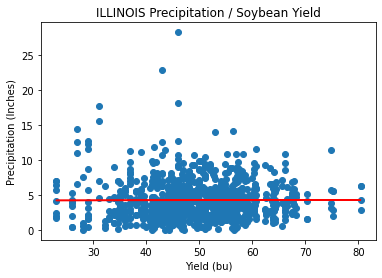

In [28]:

plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS Precipitation / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,20), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_il")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [29]:
soybean_ia = ia_df[ia_df['Soybean Yield'].notnull()]
soybean_ia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1169
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             1170 non-null   object 
 1   Year                     1170 non-null   object 
 2   MONTH                    1170 non-null   object 
 3   Precipitation (Inches)   1170 non-null   float64
 4   Maximum temperature (F)  1170 non-null   float64
 5   Minimum temperature (F)  1170 non-null   float64
 6   Unnamed: 0               1170 non-null   int64  
 7   State                    1170 non-null   object 
 8   County                   1170 non-null   object 
 9   Corn Yield               1166 non-null   float64
 10  Wheat Yield              68 non-null     float64
 11  Soybean Yield            1170 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 118.8+ KB


In [30]:
x_axis = soybean_ia["Soybean Yield"]
y_axis = soybean_ia['Precipitation (Inches)']

0.029447214791111783
2.958120542891022
0.08233368209632641
0.004832072717801752
0.0104296142834925
The r-squared is: 0.0067788352075389404


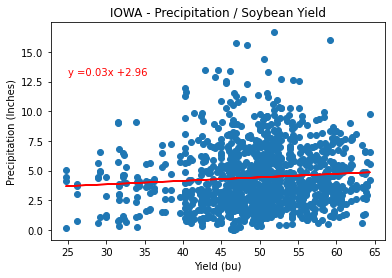

In [31]:

plt.scatter(x_axis, y_axis)
plt.title('IOWA - Precipitation / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(25,13), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_ia")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [32]:
soybean_ks = ks_df[ks_df['Soybean Yield'].notnull()]
soybean_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076 entries, 0 to 1195
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             1076 non-null   object 
 1   Year                     1076 non-null   object 
 2   MONTH                    1076 non-null   object 
 3   Precipitation (Inches)   1076 non-null   float64
 4   Maximum temperature (F)  1076 non-null   float64
 5   Minimum temperature (F)  1076 non-null   float64
 6   Unnamed: 0               1076 non-null   int64  
 7   State                    1076 non-null   object 
 8   County                   1076 non-null   object 
 9   Corn Yield               912 non-null    float64
 10  Wheat Yield              516 non-null    float64
 11  Soybean Yield            1076 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 109.3+ KB


In [33]:
x_axis = soybean_ks["Soybean Yield"]
y_axis = soybean_ks['Precipitation (Inches)']

0.034046511328544145
3.637598583599724
0.10569134695710465
0.0005153763620383458
0.009774436190814194
The r-squared is: 0.011170660821607075


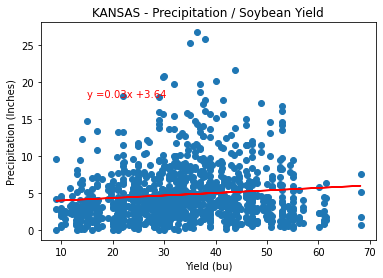

In [34]:

plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Precipitation / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,18), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_ks")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [35]:
corn_mo = mo_df[mo_df['Corn Yield'].notnull()]
corn_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 1033
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             942 non-null    object 
 1   Year                     942 non-null    object 
 2   MONTH                    942 non-null    object 
 3   Precipitation (Inches)   942 non-null    float64
 4   Maximum temperature (F)  942 non-null    float64
 5   Minimum temperature (F)  942 non-null    float64
 6   Unnamed: 0               942 non-null    int64  
 7   State                    942 non-null    object 
 8   County                   942 non-null    object 
 9   Corn Yield               942 non-null    float64
 10  Wheat Yield              412 non-null    float64
 11  Soybean Yield            882 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 95.7+ KB


In [36]:
x_axis = corn_mo["Corn Yield"]
y_axis = corn_mo['Precipitation (Inches)']

0.012621800852785057
2.812455575016208
0.15731291861442934
1.2217239389158433e-06
0.002584351468163501
The r-squared is: 0.024747354362990068


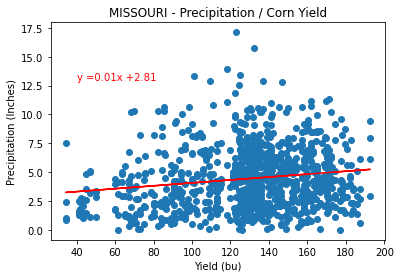

In [37]:

plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Precipitation / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,13), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_mo")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [38]:
corn_tx = tx_df[tx_df['Corn Yield'].notnull()]
corn_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 4 to 1695
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             1352 non-null   object 
 1   Year                     1352 non-null   object 
 2   MONTH                    1352 non-null   object 
 3   Precipitation (Inches)   1352 non-null   float64
 4   Maximum temperature (F)  1352 non-null   float64
 5   Minimum temperature (F)  1352 non-null   float64
 6   Unnamed: 0               1352 non-null   int64  
 7   State                    1352 non-null   object 
 8   County                   1352 non-null   object 
 9   Corn Yield               1352 non-null   float64
 10  Wheat Yield              416 non-null    float64
 11  Soybean Yield            284 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 137.3+ KB


In [39]:
x_axis = corn_tx["Corn Yield"]
y_axis = corn_tx['Precipitation (Inches)']

-0.007347531276200846
4.67784222085798
-0.06892269026442846
0.011247068589852083
0.0028945320170430944
The r-squared is: 0.004750337233286342


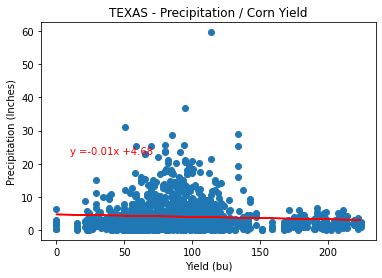

In [40]:

plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Precipitation / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,23), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_tx")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [41]:
corn_il = il_df[il_df['Corn Yield'].notnull()]
corn_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 983
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             956 non-null    object 
 1   Year                     956 non-null    object 
 2   MONTH                    956 non-null    object 
 3   Precipitation (Inches)   956 non-null    float64
 4   Maximum temperature (F)  956 non-null    float64
 5   Minimum temperature (F)  956 non-null    float64
 6   Unnamed: 0               956 non-null    int64  
 7   State                    956 non-null    object 
 8   County                   956 non-null    object 
 9   Corn Yield               956 non-null    float64
 10  Wheat Yield              296 non-null    float64
 11  Soybean Yield            928 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 97.1+ KB


In [42]:
x_axis = corn_il["Corn Yield"]
y_axis = corn_il['Precipitation (Inches)']

0.003127448494676292
3.912008364066133
0.03303288256256995
0.307588985827121
0.0030636026123794817
The r-squared is: 0.0010911713303925377


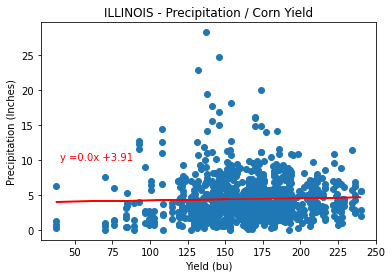

In [43]:

plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS - Precipitation / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,10), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_il")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [44]:
corn_ia = ia_df[ia_df['Corn Yield'].notnull()]
corn_ia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 0 to 1169
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             1166 non-null   object 
 1   Year                     1166 non-null   object 
 2   MONTH                    1166 non-null   object 
 3   Precipitation (Inches)   1166 non-null   float64
 4   Maximum temperature (F)  1166 non-null   float64
 5   Minimum temperature (F)  1166 non-null   float64
 6   Unnamed: 0               1166 non-null   int64  
 7   State                    1166 non-null   object 
 8   County                   1166 non-null   object 
 9   Corn Yield               1166 non-null   float64
 10  Wheat Yield              68 non-null     float64
 11  Soybean Yield            1166 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 118.4+ KB


In [45]:
x_axis = corn_ia["Corn Yield"]
y_axis = corn_ia['Precipitation (Inches)']

0.007565628262270677
3.1256054910881215
0.07188961006470022
0.01407512251333895
0.0030766438684509422
The r-squared is: 0.005168116035254648


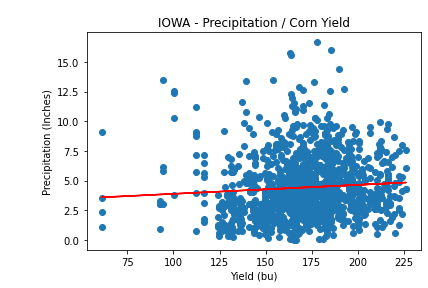

In [46]:

plt.scatter(x_axis, y_axis)
plt.title('IOWA - Precipitation / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,19), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_ia")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [47]:
corn_ks = ks_df[ks_df['Corn Yield'].notnull()]
corn_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1203
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             1036 non-null   object 
 1   Year                     1036 non-null   object 
 2   MONTH                    1036 non-null   object 
 3   Precipitation (Inches)   1036 non-null   float64
 4   Maximum temperature (F)  1036 non-null   float64
 5   Minimum temperature (F)  1036 non-null   float64
 6   Unnamed: 0               1036 non-null   int64  
 7   State                    1036 non-null   object 
 8   County                   1036 non-null   object 
 9   Corn Yield               1036 non-null   float64
 10  Wheat Yield              520 non-null    float64
 11  Soybean Yield            912 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 105.2+ KB


In [48]:
x_axis = corn_ks["Corn Yield"]
y_axis = corn_ks['Precipitation (Inches)']

0.006481900422918054
3.9269576711191028
0.059881969859928164
0.05400198766292879
0.0033602063665702487
The r-squared is: 0.003585850314305345


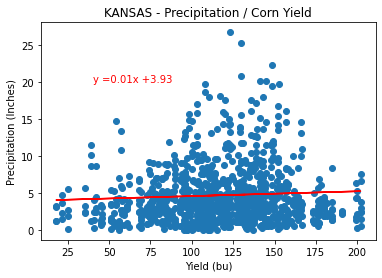

In [49]:

plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Precipitation / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,20), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_ks")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [50]:
wheat_mo = mo_df[mo_df['Wheat Yield'].notnull()]
wheat_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 997
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             424 non-null    object 
 1   Year                     424 non-null    object 
 2   MONTH                    424 non-null    object 
 3   Precipitation (Inches)   424 non-null    float64
 4   Maximum temperature (F)  424 non-null    float64
 5   Minimum temperature (F)  424 non-null    float64
 6   Unnamed: 0               424 non-null    int64  
 7   State                    424 non-null    object 
 8   County                   424 non-null    object 
 9   Corn Yield               412 non-null    float64
 10  Wheat Yield              424 non-null    float64
 11  Soybean Yield            408 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 43.1+ KB


In [51]:
x_axis = wheat_mo["Wheat Yield"]
y_axis = wheat_mo['Precipitation (Inches)']

-0.009628047303571979
4.750566937844349
-0.031581468446868856
0.5166329953010488
0.014833136111295553
The r-squared is: 0.000997389149260573


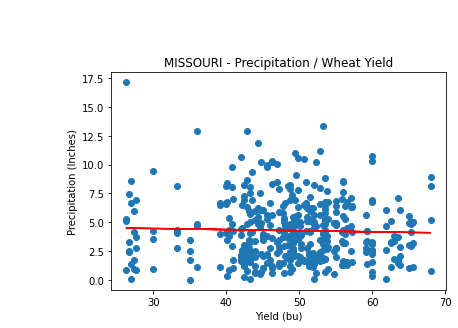

In [52]:

plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Precipitation / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,23), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_mo")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [53]:
wheat_tx = tx_df[tx_df['Wheat Yield'].notnull()]
wheat_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 1703
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             732 non-null    object 
 1   Year                     732 non-null    object 
 2   MONTH                    732 non-null    object 
 3   Precipitation (Inches)   732 non-null    float64
 4   Maximum temperature (F)  732 non-null    float64
 5   Minimum temperature (F)  732 non-null    float64
 6   Unnamed: 0               732 non-null    int64  
 7   State                    732 non-null    object 
 8   County                   732 non-null    object 
 9   Corn Yield               416 non-null    float64
 10  Wheat Yield              732 non-null    float64
 11  Soybean Yield            132 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 74.3+ KB


In [54]:
x_axis = wheat_tx["Wheat Yield"]
y_axis = wheat_tx['Precipitation (Inches)']

0.086331270404157
1.193276187765988
0.16776716092646154
5.027179277678492e-06
0.018775879958440402
The r-squared is: 0.028145820285325245


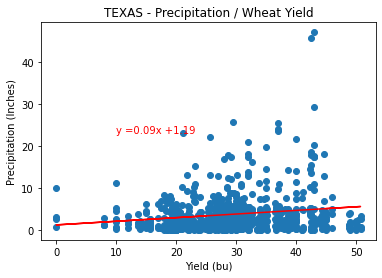

In [55]:

plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Precipitation / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,23), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_tx")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [56]:
wheat_il = il_df[il_df['Wheat Yield'].notnull()]
wheat_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 935
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             296 non-null    object 
 1   Year                     296 non-null    object 
 2   MONTH                    296 non-null    object 
 3   Precipitation (Inches)   296 non-null    float64
 4   Maximum temperature (F)  296 non-null    float64
 5   Minimum temperature (F)  296 non-null    float64
 6   Unnamed: 0               296 non-null    int64  
 7   State                    296 non-null    object 
 8   County                   296 non-null    object 
 9   Corn Yield               296 non-null    float64
 10  Wheat Yield              296 non-null    float64
 11  Soybean Yield            296 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 30.1+ KB


In [57]:
x_axis = wheat_il["Wheat Yield"]
y_axis = wheat_il['Precipitation (Inches)']

-0.007674732658959544
4.120782572254335
-0.04090444846652105
0.48326399869929193
0.010933404613870028
The r-squared is: 0.0016731739043502761


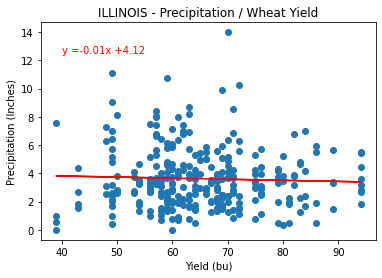

In [58]:

plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS - Precipitation / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,12.5), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_il")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [59]:
wheat_ia = ia_df[ia_df['Wheat Yield'].notnull()]
wheat_ia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 237 to 1021
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             68 non-null     object 
 1   Year                     68 non-null     object 
 2   MONTH                    68 non-null     object 
 3   Precipitation (Inches)   68 non-null     float64
 4   Maximum temperature (F)  68 non-null     float64
 5   Minimum temperature (F)  68 non-null     float64
 6   Unnamed: 0               68 non-null     int64  
 7   State                    68 non-null     object 
 8   County                   68 non-null     object 
 9   Corn Yield               68 non-null     float64
 10  Wheat Yield              68 non-null     float64
 11  Soybean Yield            68 non-null     float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.9+ KB


In [60]:
x_axis = wheat_ia["Wheat Yield"]
y_axis = wheat_ia['Precipitation (Inches)']

0.03366756602949852
1.9189120330198164
0.1859898692616903
0.12887305683266012
0.021893029297166352
The r-squared is: 0.034592231467980655


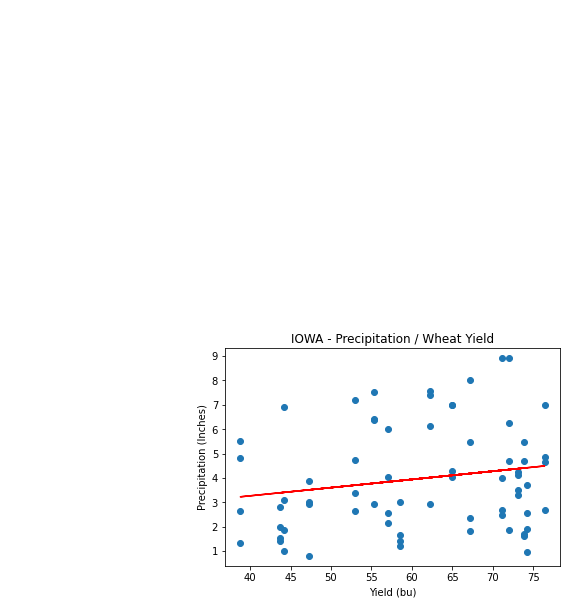

In [61]:
plt.scatter(x_axis, y_axis)
plt.title('IOWA - Precipitation / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,23), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_ia.png")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [62]:
wheat_ks = ks_df[ks_df['Wheat Yield'].notnull()]
wheat_ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 1155
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTY_STATE             548 non-null    object 
 1   Year                     548 non-null    object 
 2   MONTH                    548 non-null    object 
 3   Precipitation (Inches)   548 non-null    float64
 4   Maximum temperature (F)  548 non-null    float64
 5   Minimum temperature (F)  548 non-null    float64
 6   Unnamed: 0               548 non-null    int64  
 7   State                    548 non-null    object 
 8   County                   548 non-null    object 
 9   Corn Yield               520 non-null    float64
 10  Wheat Yield              548 non-null    float64
 11  Soybean Yield            516 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 55.7+ KB


In [63]:
x_axis = wheat_ks["Wheat Yield"]
y_axis = wheat_ks['Precipitation (Inches)']

-0.007229624121954116
4.750502036246503
-0.019351884108262746
0.6512517663234965
0.01598507972220441
The r-squared is: 0.00037449541853963223


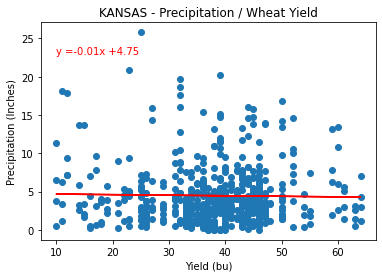

In [64]:

plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Precipitation / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Precipitation (Inches)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,23), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_ks")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [65]:
x_axis = corn_mo["Corn Yield"]
y_axis = corn_mo['Maximum temperature (F)']

-0.03139801699492977
88.41208824636604
-0.17094167256749598
1.3026219053106687e-07
0.005902697382883639
The r-squared is: 0.02922105542017301


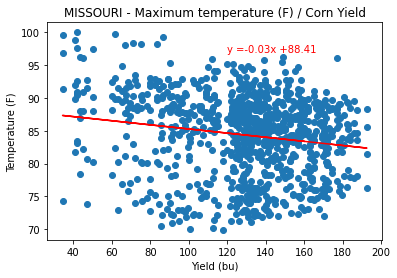

In [66]:

plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Maximum temperature (F) / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(120,97), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_mo1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [67]:
x_axis = corn_tx["Corn Yield"]
y_axis = corn_tx['Maximum temperature (F)']

-0.024144310285043047
94.87618192942327
-0.2134264943559207
2.1581785560752404e-15
0.0030079871877856626
The r-squared is: 0.04555086849305785


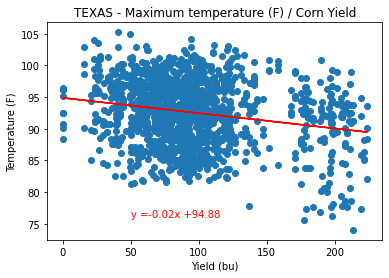

In [68]:
plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Maximum temperature (F) / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,76), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_tx1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [69]:
x_axis = corn_il["Corn Yield"]
y_axis = corn_il['Maximum temperature (F)']

-0.0042389424299875385
82.06356655939598
-0.023416850763430357
0.46956724360029867
0.005859165126465943
The r-squared is: 0.0005483488996767689


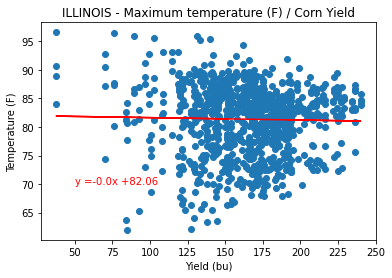

In [70]:
plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS - Maximum temperature (F) / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,70), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_il1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [71]:
x_axis = corn_ia["Corn Yield"]
y_axis = corn_ia['Maximum temperature (F)']

-0.027493381592216527
84.61228559419268
-0.1221672754246696
2.8791954552764413e-05
0.006546836041337507
The r-squared is: 0.01492484318468708


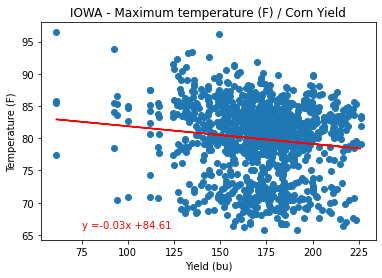

In [72]:
plt.scatter(x_axis, y_axis)
plt.title('IOWA - Maximum temperature (F) / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(75,66), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_ia1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [73]:
x_axis = corn_ks["Corn Yield"]
y_axis = corn_ks['Maximum temperature (F)']

-0.02140221320483343
89.43609053265183
-0.10862735577793788
0.0004608588668317956
0.006090902602899031
The r-squared is: 0.011799902423306693


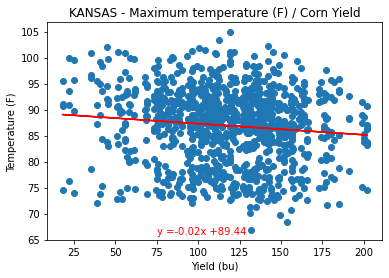

In [74]:
plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Maximum temperature (F) / Corn Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(75,66), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("corn_ks1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [75]:
x_axis = soybean_mo["Soybean Yield"]
y_axis = soybean_mo['Maximum temperature (F)']

-0.11993687762522441
88.97536260481746
-0.15393642054509535
1.5328024757836246e-06
0.02479506655081829
The r-squared is: 0.023696421570236454


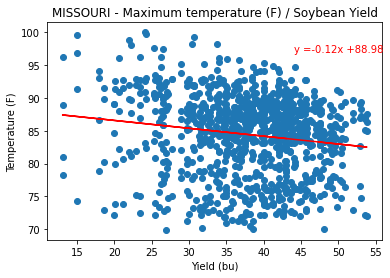

In [76]:
plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Maximum temperature (F) / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(44,97), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_mo1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [77]:
x_axis = soybean_tx["Soybean Yield"]
y_axis = soybean_tx['Maximum temperature (F)']

The r-squared is: 0.018594966842141104


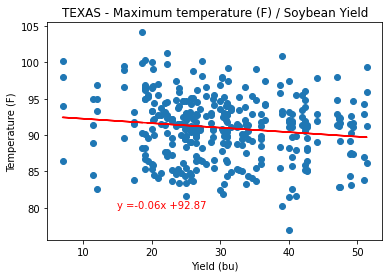

In [78]:
plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Maximum temperature (F) / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,80), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_tx1")
print(f"The r-squared is: {rvalue**2}")

In [79]:
x_axis = soybean_il["Soybean Yield"]
y_axis = soybean_il['Maximum temperature (F)']

The r-squared is: 0.008868005698678105


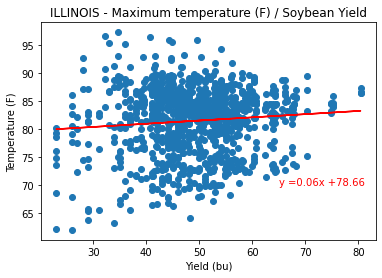

In [80]:
plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS - Maximum temperature (F) / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(65,70), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_il1")
print(f"The r-squared is: {rvalue**2}")


In [81]:
x_axis = soybean_ia["Soybean Yield"]
y_axis = soybean_ia['Maximum temperature (F)']

The r-squared is: 1.5550076922639474e-05


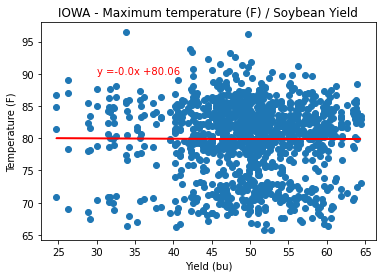

In [82]:
plt.scatter(x_axis, y_axis)
plt.title('IOWA - Maximum temperature (F) / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(30,90), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_ia1")
print(f"The r-squared is: {rvalue**2}")

In [83]:
x_axis = soybean_ks["Soybean Yield"]
y_axis = soybean_ks['Maximum temperature (F)']

The r-squared is: 0.015177313940985806


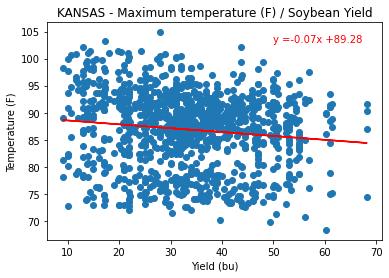

In [84]:
plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Maximum temperature (F) / Soybean Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,103), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("soybean_ks1")
print(f"The r-squared is: {rvalue**2}")


In [85]:
x_axis = wheat_mo["Wheat Yield"]
y_axis = wheat_mo['Maximum temperature (F)']

The r-squared is: 0.0071725672717049445


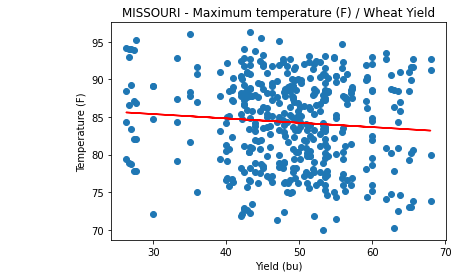

In [86]:
plt.scatter(x_axis, y_axis)
plt.title('MISSOURI - Maximum temperature (F) / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,73), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_mo1")
print(f"The r-squared is: {rvalue**2}")

In [87]:
x_axis = wheat_tx["Wheat Yield"]
y_axis = wheat_tx['Maximum temperature (F)']

-0.067748889864751
93.5854010869346
-0.11960999762995397
0.0011860077234402025
0.020813456342467004
The r-squared is: 0.014306551533037596


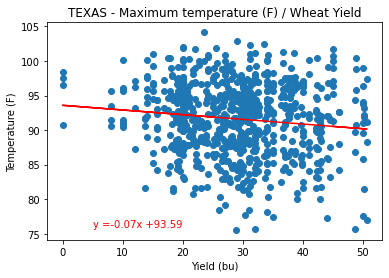

In [88]:
plt.scatter(x_axis, y_axis)
plt.title('TEXAS - Maximum temperature (F) / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,76), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_tx1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [89]:
x_axis = wheat_il["Wheat Yield"]
y_axis = wheat_il['Maximum temperature (F)']

-0.11648318330870058
88.66549503221351
-0.21503018625755257
0.00019334035407728747
0.030853905594390104
The r-squared is: 0.04623798100195775


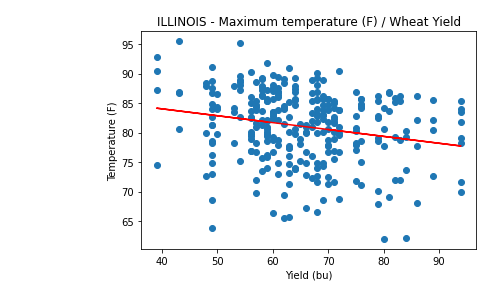

In [90]:
plt.scatter(x_axis, y_axis)
plt.title('ILLINOIS - Maximum temperature (F) / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(12,100), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_il1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")

In [91]:
x_axis = wheat_ia["Wheat Yield"]
y_axis = wheat_ia['Maximum temperature (F)']

-0.002877596758743248
86.96305746673798
-0.004289237676405416
0.9202016891171936
0.02871107853419188


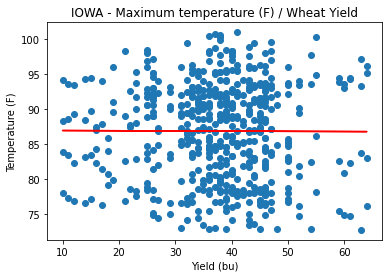

In [95]:
plt.scatter(x_axis, y_axis)
plt.title('IOWA - Maximum temperature (F) / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,70), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_ia1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)


In [93]:
x_axis = wheat_ks["Wheat Yield"]
y_axis = wheat_ks['Maximum temperature (F)']

-0.002877596758743248
86.96305746673798
-0.004289237676405416
0.9202016891171936
0.02871107853419188
The r-squared is: 1.839755984469573e-05


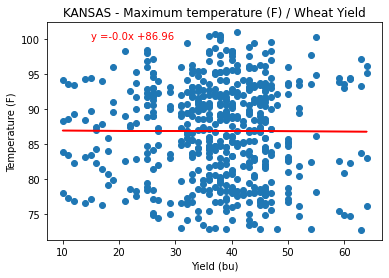

In [94]:
plt.scatter(x_axis, y_axis)
plt.title('KANSAS - Maximum temperature (F) / Wheat Yield')
plt.xlabel("Yield (bu)")
plt.ylabel('Temperature (F)')
(slope,intercept, rvalue, pvalue,stderr)  = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y =' +str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(15,100), fontsize =10, color="red")
plt.plot(x_axis,regress_values, color = 'red')
plt.savefig("wheat_ks1")
print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print(f"The r-squared is: {rvalue**2}")